<a href="https://colab.research.google.com/github/Jlauf-MBAPMP/NewGitTest/blob/master/Copy_of_kNN_Labs_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy matplotlib ipywidgets scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from ipywidgets import interactive, IntSlider, FloatSlider
%matplotlib inline

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    return max(set(k_nearest_labels), key=k_nearest_labels.count)

# Generate sample data
X, y = make_blobs(n_samples=100, centers=2, random_state=42)

# Test the kNN implementation
test_point = [0, 0]
k = 3
prediction = knn_predict(X, y, test_point, k)
print(f"Prediction for point {test_point} with k={k}: {prediction}")

Explanation of the code:

euclidean_distance: Calculates the Euclidean distance between two points.
knn_predict: Implements the kNN algorithm for a single test point.
We generate sample data using make_blobs and test our implementation.

##Visualizing Decision Boundaries
Now, let's visualize the decision boundaries for different values of k:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import matplotlib.patches as mpatches

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()



def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()


# X_C2, y_C2 from above binary classification two features
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)





# Adversarial Examples with kNN

Let's look at a simpler example of an adversarial example. What will the red star below be categorized as when k=2.

Remember that Adversarial Examples manifest themselves when the model makes predictions that are counter to the input point's true label.

In [ ]:
def plot_adversarial_example():
    X_adv = np.array([[2,.5],[-.33, .5],[0.75, 1.5],[0,1.5],[0.75, 0.5], [.5,1.5],[1, 1], [1.1, 1.1], [2, 2], [2.1, 2.1]])
    y_adv = np.array([0,1, 0, 1, 1, 1, 0, 0, 1, 1])

    clf = KNeighborsClassifier(n_neighbors=2)
    clf.fit(X_adv, y_adv)

    x_min, x_max = X_adv[:, 0].min() - 0.5, X_adv[:, 0].max() + 0.5
    y_min, y_max = X_adv[:, 1].min() - 0.5, X_adv[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_adv[:, 0], X_adv[:, 1], c=y_adv, s=100, alpha=0.8)
    plt.plot(0.5, 0.5, 'r*', markersize=20)
    plt.title("Adversarial Example (k=2)")
    plt.show()

plot_adversarial_example()

We create a scenario where a point (0.5, 0.5) is very close to a positive class point but is classified as negative (purple class).

Based on the location of the other yellow dots it looks like the red star should have been categorized as the yellow class.
This demonstrates how depending on the size of k, kNN can be sensitive adversarial examples.

In [ ]:
!pip install plotly scikit-learn


#Data Poisoning

In the following example you will work through an interactive example of data poisoning the following chart points. You can place data points anywhere on the chart by clicking on the location you want to drop a point. For the interactive charts to work you need to execute the next code block.

## Try to find the correct location (feature values) and use the minimum amount of points to switch points from one classification to the other. You can reset the chart by rerunning the code block that generates the chart.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

##Data poisoning exercise #1 (where k=1)

When k=1 try to get any point to be miss classified (blue plus in red area or red minus in blue area). Is it possible? Why are why not?

- To add a positive point: click on the title bar, press 'p', then click a location on the chart.
- To add a negative point: click on the title bar, press 'n', then click a location on the chart.
- To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.

The default is to add a positive class point when you click on the chart below.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from IPython.display import display, Javascript
from google.colab import output

# Generate a toy dataset
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X = np.array([[0.5,1.15],[1.5,1.25],[1.8,1.5],[0.5,0.7],[0.6,2],[0,2],[2,.5],[-.33, .5],[1, 1.6],[0,1.5],[0.75, 0.5], [.3,1.5],[1, 1], [1.1, 1.1], [2, 2], [2.1, 2.1]])
y = np.array([1,0, 1, 1, 0,0,0,1, 0, 1, 1, 1, 0, 0, 1, 1])

k = 1  # Initial value of k
fig = None
def create_meshgrid(X, margin=0.25, mesh_size=0.02):
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))
    return xx, yy

def plot_decision_boundary(clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return go.Contour(x=xx[0], y=yy[:, 0], z=Z, showscale=False, colorscale='RdBu', opacity=0.5)

def update_plot(k):
    global X, y, fig
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    xx, yy = create_meshgrid(X)
    contour = plot_decision_boundary(clf, xx, yy)

    marker_symbols = [1 if label == 0 else 3 for label in y]

    # Check if fig already exists, if not, create it
    if fig is None:
        scatter = go.Scatter(
            #x=X[:, 0]+[0.75],
            #y=X[:, 1]+[1.5],
            x=X[:, 0],
            y=X[:, 1],
            mode='markers',
            marker=dict(
                color=y,
                colorscale='RdBu',
                line=dict(width=1),
                #symbol=marker_symbols + [7],
                symbol=marker_symbols,
                size=15
            )
        )



        fig = go.FigureWidget(data=[contour, scatter])
        display(fig)  # Display the figure only once at creation
        fig.update_layout(
            title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})',
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            width=700,
            height=500,
            margin=dict(l=0, r=0, b=0, t=40)
        )



    else:
        # Update existing traces (contour and scatter)
        with fig.batch_update():
            fig.data[0].x = xx[0]
            fig.data[0].y = yy[:, 0]
            fig.data[0].z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            #fig.data[1].x = X[:, 0]+[0.75]
            #fig.data[1].y = X[:, 1]+[1.5]
            fig.data[1].x = X[:, 0]
            fig.data[1].y = X[:, 1]
            fig.data[1].marker.color = y
            #fig.data[1].marker.symbol = marker_symbols+ [7]
            fig.data[1].marker.symbol = marker_symbols

            fig.update_layout(title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})')




# Create initial plot
update_plot(k)

# JavaScript to handle key events and clicks
display(Javascript("""
(function() {
    var addClass = 1;

    function simulateClick(x, y, elem) {

      if (element) {
        var clickEvent = new MouseEvent('click', {
          'view': window,
          'bubbles': true,
          'cancelable': true,
          'clientX': x,
          'clientY': y
        });
        element.dispatchEvent(clickEvent);
      }
    }

    function updateKNN(event) {

        if (event.key === 'k') {
            new_k = prompt("Enter a value for k")
            // alert("new_k is " + new_k)
            google.colab.kernel.invokeFunction('notebook.update_k', [new_k], {});
        } else if (event.key === 'p') {
            addClass = 1;
            // alert("Click chart location to add a positive point")
        } else if (event.key === 'n') {
            addClass = 0;
            // alert("Click chart location to add a negative point")
        }
    }

    function updatePlot(event) {

        var plotlyElement = document.querySelector('.js-plotly-plot');
        //simulateClick(409,24, plotlyElement);
        if (event.clientY > 47 && plotlyElement && plotlyElement.contains(event.target)) {
            var rect = plotlyElement.getBoundingClientRect();
            var x = event.clientX - rect.left;
            var y = event.clientY - rect.top;
            console.log('y is = ' + y + ' event.clientY is = ' + event.clientY + ' rect.top is = ' + rect.top);
            console.log('x is = ' + x + ' event.clientX is = ' + event.clientX + ' rect.left is = ' + rect.left );
            var dom_rect = plotlyElement.getBoundingClientRect()
            var dom_rect_left = dom_rect.left
            var dom_rect_top = dom_rect.top
            var dom_rect_width = dom_rect.width
            var dom_rect_height = dom_rect.height
            //google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height], {});
            google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass], {});
        }
    }



    var plotlyElement = document.querySelector('.js-plotly-plot');
    if (plotlyElement) {
        plotlyElement.addEventListener('keydown', updateKNN);
        plotlyElement.addEventListener('click', updatePlot);
    }

    document.addEventListener('keydown', updateKNN);
    document.addEventListener('click', updatePlot);
    })();
"""))

# Define Python functions to handle JavaScript events

def add_point(x_coord, y_coord, class_label, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)
    margin_left = dom_rect_left
    margin_top = dom_rect_top

    plot_width = fig.layout.width - margin_left
    plot_height = fig.layout.height - margin_top

    #x_scaled = x_range[0] + ((x_coord - margin_left) / plot_width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - ((y_coord - margin_top) / plot_height) * (y_range[1] - y_range[0])


    #x_scaled = x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0])

    ##x_scaled = x_range[0] + ((x_coord - plot_left) / dom_rect_width) * (x_range[1] - x_range[0])
    ##y_scaled = y_range[1] - ((y_coord - plot_top) / dom_rect_height) * (y_range[1] - y_range[0])

    x_scaled = x_range[0] + ((x_coord - dom_rect_left) / dom_rect_width) * (x_range[1] - x_range[0])
    y_scaled = y_range[1] - ((y_coord - dom_rect_top) / dom_rect_height) * (y_range[1] - y_range[0])


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)


def add_point(x_coord, y_coord, class_label):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)

    x_scaled = (x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0]))
    y_scaled = (y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0]))


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)

def update_k(test_k):
    global k
    k = int(test_k)
    update_plot(k)

output.register_callback('notebook.update_k', update_k)
output.register_callback('notebook.add_point', add_point)

print("""To add a positive point: click on the title bar, press 'p', then click a location on the chart.
To add a negative point: click on the title bar, press 'n', then click a location on the chart.
To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.""")



##Data poisoning exercise #2 (where k=2)

When k=2 try to get any point to be miss classified (blue plus in red area or red minus in blue area). Is it possible? Why are why not?

- To add a positive point: click on the title bar, press 'p', then click a location on the chart.
- To add a negative point: click on the title bar, press 'n', then click a location on the chart.
- To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.

The default is to add a positive class point when you click on the chart below.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from IPython.display import display, Javascript
from google.colab import output

# Generate a toy dataset
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X = np.array([[0.5,1.15],[1.5,1.25],[2,1.5],[0.5,0.7],[0.6,2],[0,2],[2,.5],[-.33, .5],[1, 1.6],[0,1.5],[0.75, 0.5], [.3,1.5],[1, 1], [1.1, 1.1], [2, 2], [2.1, 2.1]])
y = np.array([1,0, 1, 1, 0,0,0,1, 0, 1, 1, 1, 0, 0, 1, 1])

k = 2  # Initial value of k
fig = None
def create_meshgrid(X, margin=0.25, mesh_size=0.02):
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))
    return xx, yy

def plot_decision_boundary(clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return go.Contour(x=xx[0], y=yy[:, 0], z=Z, showscale=False, colorscale='RdBu', opacity=0.5)

def update_plot(k):
    global X, y, fig
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    xx, yy = create_meshgrid(X)
    contour = plot_decision_boundary(clf, xx, yy)

    marker_symbols = [1 if label == 0 else 3 for label in y]

    # Check if fig already exists, if not, create it
    if fig is None:
        scatter = go.Scatter(
            #x=X[:, 0]+[0.75],
            #y=X[:, 1]+[1.5],
            x=X[:, 0],
            y=X[:, 1],
            mode='markers',
            marker=dict(
                color=y,
                colorscale='RdBu',
                line=dict(width=1),
                #symbol=marker_symbols + [7],
                symbol=marker_symbols,
                size=15
            )
        )



        fig = go.FigureWidget(data=[contour, scatter])
        display(fig)  # Display the figure only once at creation
        fig.update_layout(
            title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})',
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            width=700,
            height=500,
            margin=dict(l=0, r=0, b=0, t=40)
        )



    else:
        # Update existing traces (contour and scatter)
        with fig.batch_update():
            fig.data[0].x = xx[0]
            fig.data[0].y = yy[:, 0]
            fig.data[0].z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            #fig.data[1].x = X[:, 0]+[0.75]
            #fig.data[1].y = X[:, 1]+[1.5]
            fig.data[1].x = X[:, 0]
            fig.data[1].y = X[:, 1]
            fig.data[1].marker.color = y
            #fig.data[1].marker.symbol = marker_symbols+ [7]
            fig.data[1].marker.symbol = marker_symbols

            fig.update_layout(title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})')




# Create initial plot
update_plot(k)

# JavaScript to handle key events and clicks
display(Javascript("""
(function() {
    var addClass = 1;

    function simulateClick(x, y, elem) {

      if (element) {
        var clickEvent = new MouseEvent('click', {
          'view': window,
          'bubbles': true,
          'cancelable': true,
          'clientX': x,
          'clientY': y
        });
        element.dispatchEvent(clickEvent);
      }
    }

    function updateKNN(event) {

        if (event.key === 'k') {
            new_k = prompt("Enter a value for k")
            // alert("new_k is " + new_k)
            google.colab.kernel.invokeFunction('notebook.update_k', [new_k], {});
        } else if (event.key === 'p') {
            addClass = 1;
            // alert("Click chart location to add a positive point")
        } else if (event.key === 'n') {
            addClass = 0;
            // alert("Click chart location to add a negative point")
        }
    }

    function updatePlot(event) {

        var plotlyElement = document.querySelector('.js-plotly-plot');
        //simulateClick(409,24, plotlyElement);
        if (event.clientY > 47 && plotlyElement && plotlyElement.contains(event.target)) {
            var rect = plotlyElement.getBoundingClientRect();
            var x = event.clientX - rect.left;
            var y = event.clientY - rect.top;
            console.log('y is = ' + y + ' event.clientY is = ' + event.clientY + ' rect.top is = ' + rect.top);
            console.log('x is = ' + x + ' event.clientX is = ' + event.clientX + ' rect.left is = ' + rect.left );
            var dom_rect = plotlyElement.getBoundingClientRect()
            var dom_rect_left = dom_rect.left
            var dom_rect_top = dom_rect.top
            var dom_rect_width = dom_rect.width
            var dom_rect_height = dom_rect.height
            //google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height], {});
            google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass], {});
        }
    }



    var plotlyElement = document.querySelector('.js-plotly-plot');
    if (plotlyElement) {
        plotlyElement.addEventListener('keydown', updateKNN);
        plotlyElement.addEventListener('click', updatePlot);
    }

    document.addEventListener('keydown', updateKNN);
    document.addEventListener('click', updatePlot);
    })();
"""))

# Define Python functions to handle JavaScript events

def add_point(x_coord, y_coord, class_label, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)
    margin_left = dom_rect_left
    margin_top = dom_rect_top

    plot_width = fig.layout.width - margin_left
    plot_height = fig.layout.height - margin_top

    #x_scaled = x_range[0] + ((x_coord - margin_left) / plot_width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - ((y_coord - margin_top) / plot_height) * (y_range[1] - y_range[0])


    #x_scaled = x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0])

    ##x_scaled = x_range[0] + ((x_coord - plot_left) / dom_rect_width) * (x_range[1] - x_range[0])
    ##y_scaled = y_range[1] - ((y_coord - plot_top) / dom_rect_height) * (y_range[1] - y_range[0])

    x_scaled = x_range[0] + ((x_coord - dom_rect_left) / dom_rect_width) * (x_range[1] - x_range[0])
    y_scaled = y_range[1] - ((y_coord - dom_rect_top) / dom_rect_height) * (y_range[1] - y_range[0])


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)


def add_point(x_coord, y_coord, class_label):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)

    x_scaled = (x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0]))
    y_scaled = (y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0]))


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)

def update_k(test_k):
    global k
    k = int(test_k)
    update_plot(k)

output.register_callback('notebook.update_k', update_k)
output.register_callback('notebook.add_point', add_point)

print("""To add a positive point: click on the title bar, press 'p', then click a location on the chart.
To add a negative point: click on the title bar, press 'n', then click a location on the chart.
To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.""")


##Data poisoning exercise #3 (where k=3)

When k=3 try to get any point to be miss classified (blue plus in red area or red minus in blue area). Is it possible? Why are why not?

- To add a positive point: click on the title bar, press 'p', then click a location on the chart.
- To add a negative point: click on the title bar, press 'n', then click a location on the chart.
- To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.

The default is to add a positive class point when you click on the chart below.

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from IPython.display import display, Javascript
from google.colab import output

# Generate a toy dataset
#X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

X = np.array([[0.5,1.15],[1.5,1.25],[1.8,1.5],[0.5,0.7],[0.6,2],[0,2],[2,.5],[-.33, .5],[1, 1.6],[0,1.5],[0.75, 0.5], [.3,1.5],[1, 1], [1.1, 1.1], [2, 2], [2.1, 2.1]])
y = np.array([1,0, 1, 1, 0,0,0,1, 0, 1, 1, 1, 0, 0, 1, 1])

k = 3  # Initial value of k
fig = None
def create_meshgrid(X, margin=0.25, mesh_size=0.02):
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_size), np.arange(y_min, y_max, mesh_size))
    return xx, yy

def plot_decision_boundary(clf, xx, yy):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return go.Contour(x=xx[0], y=yy[:, 0], z=Z, showscale=False, colorscale='RdBu', opacity=0.5)

def update_plot(k):
    global X, y, fig
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    xx, yy = create_meshgrid(X)
    contour = plot_decision_boundary(clf, xx, yy)

    marker_symbols = [1 if label == 0 else 3 for label in y]

    # Check if fig already exists, if not, create it
    if fig is None:
        scatter = go.Scatter(
            #x=X[:, 0]+[0.75],
            #y=X[:, 1]+[1.5],
            x=X[:, 0],
            y=X[:, 1],
            mode='markers',
            marker=dict(
                color=y,
                colorscale='RdBu',
                line=dict(width=1),
                #symbol=marker_symbols + [7],
                symbol=marker_symbols,
                size=15
            )
        )



        fig = go.FigureWidget(data=[contour, scatter])
        display(fig)  # Display the figure only once at creation
        fig.update_layout(
            title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})',
            xaxis_title='Feature 1',
            yaxis_title='Feature 2',
            width=700,
            height=500,
            margin=dict(l=0, r=0, b=0, t=40)
        )



    else:
        # Update existing traces (contour and scatter)
        with fig.batch_update():
            fig.data[0].x = xx[0]
            fig.data[0].y = yy[:, 0]
            fig.data[0].z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            #fig.data[1].x = X[:, 0]+[0.75]
            #fig.data[1].y = X[:, 1]+[1.5]
            fig.data[1].x = X[:, 0]
            fig.data[1].y = X[:, 1]
            fig.data[1].marker.color = y
            #fig.data[1].marker.symbol = marker_symbols+ [7]
            fig.data[1].marker.symbol = marker_symbols

            fig.update_layout(title=f'**CLICK TITLE BAR (HERE) FIRST**  k-NN Decision Boundary (k={k})')




# Create initial plot
update_plot(k)

# JavaScript to handle key events and clicks
display(Javascript("""
(function() {
    var addClass = 1;

    function simulateClick(x, y, elem) {

      if (element) {
        var clickEvent = new MouseEvent('click', {
          'view': window,
          'bubbles': true,
          'cancelable': true,
          'clientX': x,
          'clientY': y
        });
        element.dispatchEvent(clickEvent);
      }
    }

    function updateKNN(event) {

        if (event.key === 'k') {
            new_k = prompt("Enter a value for k")
            google.colab.kernel.invokeFunction('notebook.update_k', [new_k], {});
        } else if (event.key === 'p') {
            addClass = 1;
        } else if (event.key === 'n') {
            addClass = 0;
        }
    }

    function updatePlot(event) {

        var plotlyElement = document.querySelector('.js-plotly-plot');
        //simulateClick(409,24, plotlyElement);
        if (event.clientY > 47 && plotlyElement && plotlyElement.contains(event.target)) {
            var rect = plotlyElement.getBoundingClientRect();
            var x = event.clientX - rect.left;
            var y = event.clientY - rect.top;
            console.log('y is = ' + y + ' event.clientY is = ' + event.clientY + ' rect.top is = ' + rect.top);
            console.log('x is = ' + x + ' event.clientX is = ' + event.clientX + ' rect.left is = ' + rect.left );
            var dom_rect = plotlyElement.getBoundingClientRect()
            var dom_rect_left = dom_rect.left
            var dom_rect_top = dom_rect.top
            var dom_rect_width = dom_rect.width
            var dom_rect_height = dom_rect.height
            //google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height], {});
            google.colab.kernel.invokeFunction('notebook.add_point', [x, y, addClass], {});
        }
    }



    var plotlyElement = document.querySelector('.js-plotly-plot');
    if (plotlyElement) {
        plotlyElement.addEventListener('keydown', updateKNN);
        plotlyElement.addEventListener('click', updatePlot);
    }

    document.addEventListener('keydown', updateKNN);
    document.addEventListener('click', updatePlot);
    })();
"""))

# Define Python functions to handle JavaScript events

def add_point(x_coord, y_coord, class_label, dom_rect_left, dom_rect_top, dom_rect_width, dom_rect_height):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)
    margin_left = dom_rect_left
    margin_top = dom_rect_top

    plot_width = fig.layout.width - margin_left
    plot_height = fig.layout.height - margin_top

    #x_scaled = x_range[0] + ((x_coord - margin_left) / plot_width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - ((y_coord - margin_top) / plot_height) * (y_range[1] - y_range[0])


    #x_scaled = x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0])
    #y_scaled = y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0])

    ##x_scaled = x_range[0] + ((x_coord - plot_left) / dom_rect_width) * (x_range[1] - x_range[0])
    ##y_scaled = y_range[1] - ((y_coord - plot_top) / dom_rect_height) * (y_range[1] - y_range[0])

    x_scaled = x_range[0] + ((x_coord - dom_rect_left) / dom_rect_width) * (x_range[1] - x_range[0])
    y_scaled = y_range[1] - ((y_coord - dom_rect_top) / dom_rect_height) * (y_range[1] - y_range[0])


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)


def add_point(x_coord, y_coord, class_label):
    global X, y, fig
    x_range = fig.layout.xaxis.range
    y_range = fig.layout.yaxis.range

    #dom_rect = document.querySelector('.js-plotly-plot').getBoundingClientRect()
    #print(dom_rect)

    x_scaled = (x_range[0] + (x_coord / fig.layout.width) * (x_range[1] - x_range[0]))
    y_scaled = (y_range[1] - (y_coord / fig.layout.height) * (y_range[1] - y_range[0]))


    new_point = np.array([[x_scaled, y_scaled]])
    X = np.vstack([X, new_point])
    y = np.append(y, class_label)
    update_plot(k)

def update_k(test_k):
    global k
    k = int(test_k)
    update_plot(k)

output.register_callback('notebook.update_k', update_k)
output.register_callback('notebook.add_point', add_point)

print("""To add a positive point: click on the title bar, press 'p', then click a location on the chart.
To add a negative point: click on the title bar, press 'n', then click a location on the chart.
To change the number of nearest neighbors (k): click on the title bar, press 'k', then input a new value.""")



#Ponder

## What did you notice about the ease of poisoning kNN as k gets bigger?


## Why was this the case?



Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# Model Inversion

Model Inversion takes place when the attacker would like to determine what the input is for a know output label.

## What is a way that an attacker could figure out the valid inputs for a known label?

#Model Inference

Is there anything we can learn from the behavior of the model to determine any characteristics of the models such as the hyperparameter values, number of layers, if they are using Dropout, etc.

# Training Dataset Leakage

Are there any signs that the inputs provided to the model were part of the training set. One way to identify the use of training data as inputs to the model is when output confidence scores are significantly higher for input values when providing training data as input to the model?

Could you identify training data by iterating through all the possible input feature values if k=1?



Could you identify training by iterating through all the possible input feature values if k=9? What would be lookin for from the picture if we picked the point [3.5,3]


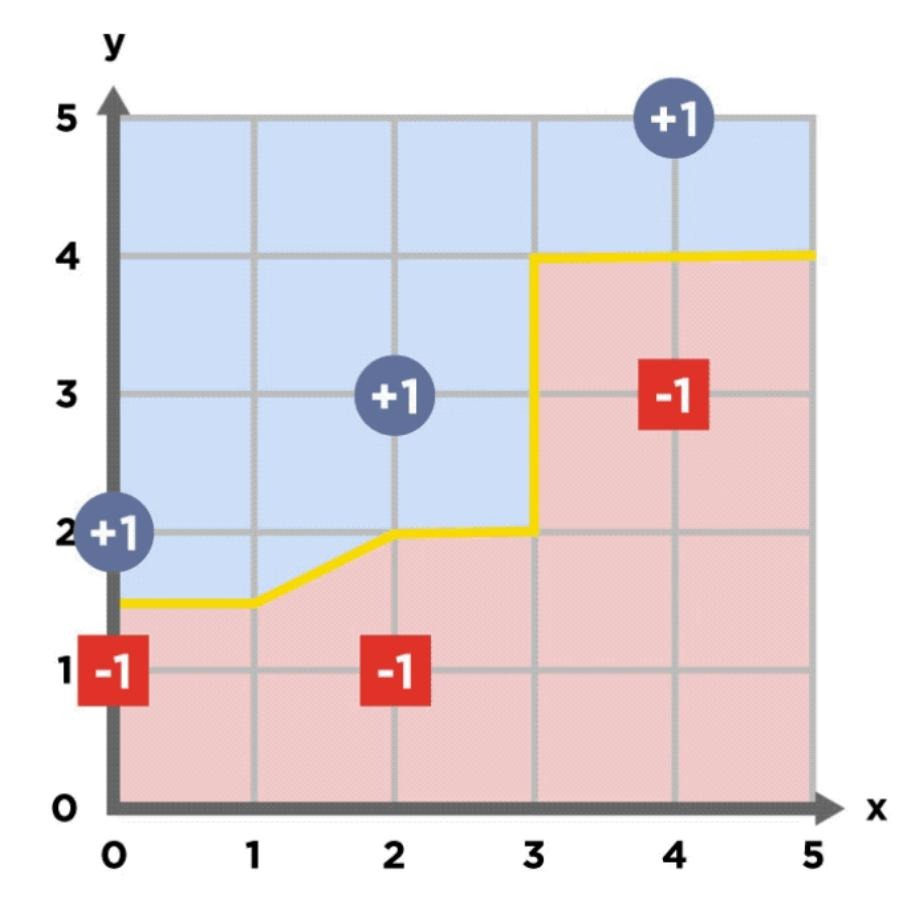

In [ ]:
from IPython.display import Image, display
display(Image(filename='k=1.jpg'))

What is the prediction of the black dot and is the black dot a training point?

#Model Stealing

Model Stealing involves copying to obtaining the model internal configuration. In the case of kNN it would be obtaining the training data.

Based on the answer above how would one steal the model?